In [133]:
library(geometry)
library(tidyverse)
library(factoextra)
library(gridExtra)
library(ggbiplot)

ERROR: Error in library(ggbiplot): there is no package called ‘ggbiplot’


In [85]:
#Variable X
set.seed(115)
X = sort(rnorm(30, 0, 2))
X

[1] -3.06185366 -1.96717963 -1.62653008 -1.36232995 -1.14249165 -1.12910081
 [7] -1.02512164 -0.36833710 -0.28485613 -0.26057150 -0.04936068 -0.03111122
[13]  0.06828326  0.07302468  0.22211987  0.42336392  0.49107933  0.54438860
[19]  0.83503517  0.93035555  0.93371242  1.08095132  1.14475740  1.26475054
[25]  1.43596331  1.44756263  1.94439933  2.04963232  2.37093268  3.15959001

In [88]:
#Varaible W
noise = rnorm(30, 0, 2)
W = 0.5 * X + 0.7*noise
W

[1]  0.8930288 -2.2967528  1.2034081 -0.9553228  0.2175504  1.0188552
 [7] -0.8265908 -2.0908450 -2.5088998 -0.5650008 -0.5516616 -1.1222641
[13] -0.0658635 -1.2061586 -2.1715491 -1.1115066  1.7113152  0.1312433
[19] -1.4397771 -0.6427779  2.3449137  1.2635338  0.1856913  1.1423189
[25]  1.7356033 -2.2916984  1.9253932  2.5347404  4.5214027  2.3289154

In [89]:
cor.test(W,X)


	Pearson's product-moment correlation

data:  W and X
t = 2.6337, df = 28, p-value = 0.0136
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1016230 0.6943804
sample estimates:
      cor 
0.4455789 


In [90]:
#Variable Y
set.seed(150)
Y = sort(rnorm(30,20,10))
Y

[1] -2.0903059  0.4081494  3.6769030  7.8548678 12.5438825 12.9455314
 [7] 13.2301908 13.2998854 16.8512736 16.8582182 17.3305373 19.3700374
[13] 19.5293938 19.7598064 19.8923716 21.5315947 21.6924792 22.4253579
[19] 22.9112723 23.5197394 24.9763563 27.6456455 28.1388693 29.7293531
[25] 33.0134269 33.0330834 33.1914671 36.5296585 40.2631607 44.6823192

In [91]:
#Variable Z
noise2 = rnorm(30, 0, 2)
Z = 0.9 * Y + 0.1*noise2
Z

[1] -1.655736 -0.128831  3.375425  7.317701 11.250260 11.692988 12.160877
 [8] 11.619191 15.295090 14.946483 15.436026 17.410811 17.355428 17.939741
[15] 17.871335 19.242895 19.850863 20.419874 20.682428 21.204949 22.608371
[22] 24.863968 24.943429 26.736490 29.622877 29.616957 29.638805 32.873895
[29] 36.177893 40.062464

In [92]:
cor.test(Y,Z)


	Pearson's product-moment correlation

data:  Y and Z
t = 266.58, df = 28, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9995813 0.9999074
sample estimates:
      cor 
0.9998031 


In [93]:
cor.test(X,Y)
#Does this suggests there is correlation between X and Y
#even though they are generatred from different seeds
#with different means and standard deviations?


	Pearson's product-moment correlation

data:  X and Y
t = 31.03, df = 28, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9699832 0.9932824
sample estimates:
    cor 
0.98577 


In [122]:
#Part 4 Outcome
var=rnorm(5,2,1)
var
outcome = var[1]+(var[2]*W)+(var[3]*X)+(var[4]*Y)+(var[5]*Z)
outcome

[1] 2.335660 3.290479 3.164555 1.445352 3.483523

[1] -13.20427 -11.30587  18.22099  31.72545  56.75689  61.55872  57.85670
 [8]  53.98888  70.81555  76.08441  79.18469  87.19190  91.01990  89.65128
[15]  86.89981  98.17182 110.02495 108.03589 105.40318 111.02699 127.86273
[22] 136.48590 134.13089 146.20335 163.49879 150.29153 166.04508 184.47751
[29] 208.93713 224.13777

In [123]:
my_data=tibble(outcome, W, X, Y, Z)
my_data

outcome,W,X,Y,Z
-13.20427,0.8930288,-3.06185366,-2.0903059,-1.655736
-11.30587,-2.2967528,-1.96717963,0.4081494,-0.128831
18.22099,1.2034081,-1.62653008,3.6769030,3.375425
31.72545,-0.9553228,-1.36232995,7.8548678,7.317701
56.75689,0.2175504,-1.14249165,12.5438825,11.250260
61.55872,1.0188552,-1.12910081,12.9455314,11.692988
57.85670,-0.8265908,-1.02512164,13.2301908,12.160877
53.98888,-2.0908450,-0.36833710,13.2998854,11.619191
70.81555,-2.5088998,-0.28485613,16.8512736,15.295090
76.08441,-0.5650008,-0.26057150,16.8582182,14.946483


[1] 2.335660 3.290479 3.164555 1.445352 3.483523

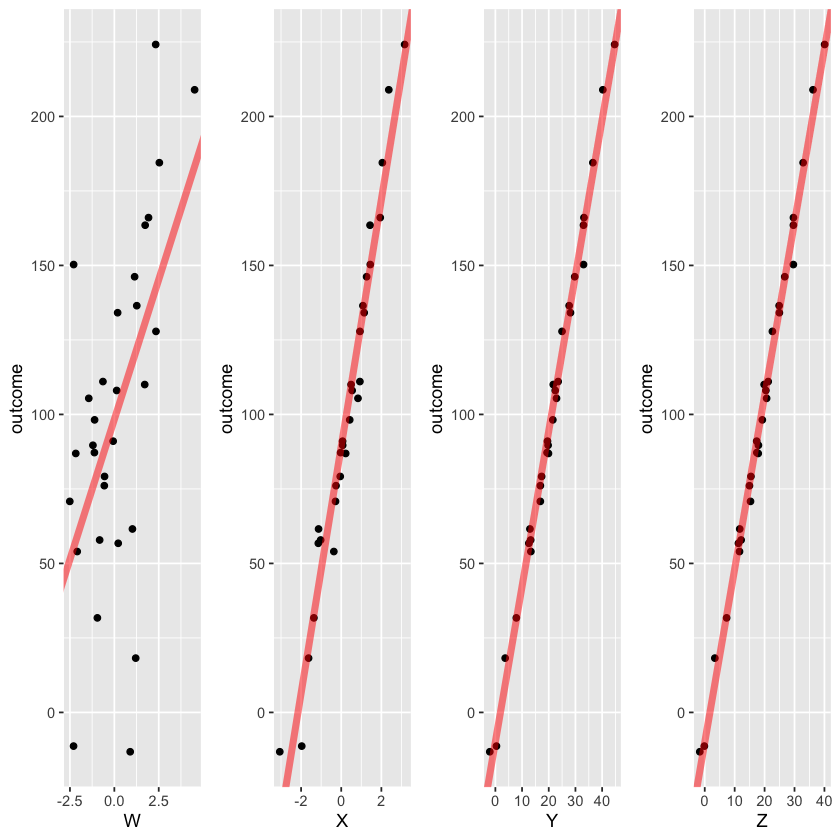

In [124]:
var

lm_modelW = lm(outcome~W , data = my_data)
lm_modelX = lm(outcome~X , data = my_data)
lm_modelY = lm(outcome~Y , data = my_data)
lm_modelZ = lm(outcome~Z , data = my_data)

plot_W= ggplot(my_data) +
  geom_point(aes(x=W, y=outcome)) + 
  geom_abline(intercept = lm_modelW$coefficients[1], slope = lm_modelW$coefficients[2], color = 2, size=2, alpha=0.5)

plot_X=plot_1= ggplot(my_data) +
  geom_point(aes(x=X, y=outcome)) + 
  geom_abline(intercept = lm_modelX$coefficients[1], slope = lm_modelX$coefficients[2], color = 2, size=2, alpha=0.5)

plot_Y=plot_1= ggplot(my_data) +
  geom_point(aes(x=Y, y=outcome)) + 
  geom_abline(intercept = lm_modelY$coefficients[1], slope = lm_modelY$coefficients[2], color = 2, size=2, alpha=0.5)

plot_Z=plot_1= ggplot(my_data) +
  geom_point(aes(x=Z, y=outcome)) + 
  geom_abline(intercept = lm_modelZ$coefficients[1], slope = lm_modelZ$coefficients[2], color = 2, size=2, alpha=0.5)

grid.arrange(plot_W, plot_X, plot_Y, plot_Z, nrow=1)



The regression between the outcome and Y and Z are very close, which makes sense because the correlation of Y and Z is very high. Although X and Y are independent, the `cor.test` of X and Y is high, and therefore the regressions are similar. Finally, W and X are only mildly correlated, which is reflected in the regression between the outcome and W and X.

In [131]:
#Part 6
my_data2=tibble(W,X,Y,Z)
my_data2_pca=prcomp(my_data2)
summary(my_data2_pca)



Importance of components:
                           PC1     PC2     PC3     PC4
Standard deviation     14.9561 1.51402 0.22798 0.13484
Proportion of Variance  0.9896 0.01014 0.00023 0.00008
Cumulative Proportion   0.9896 0.99969 0.99992 1.00000

PC1 explains 98% of the varaince of the data set, PC2 exaplins 1% of the varaince of the data set.

Outcome does not need to be included becuase it is user generated in order to check that the model parameter were properly generated. It is not an actual part of the data set

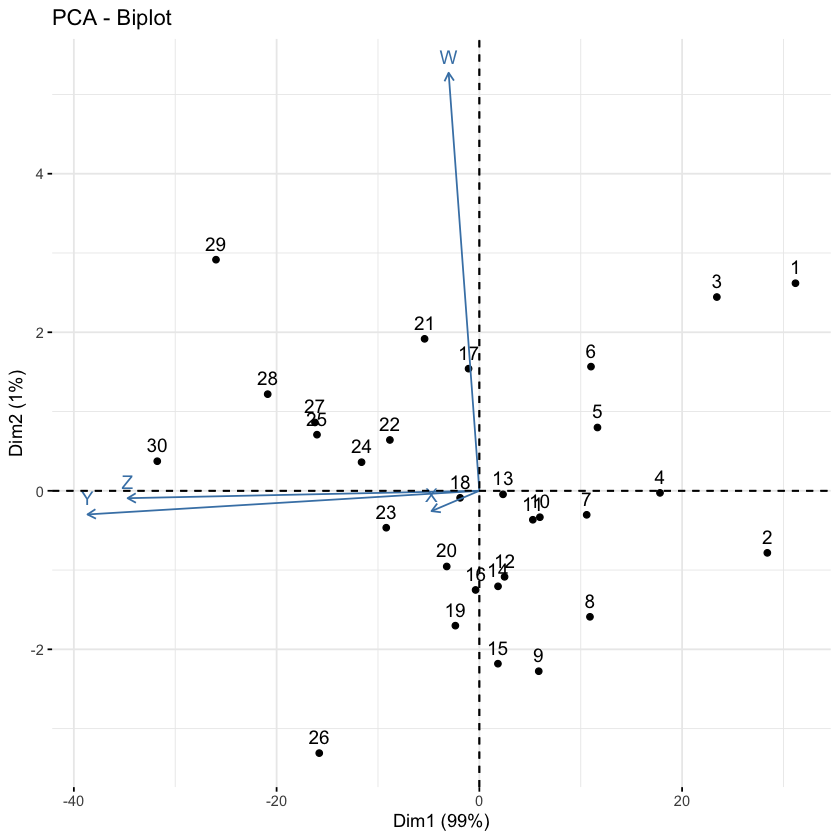

In [135]:
#Part 7
fviz_pca_biplot(my_data2_pca)

### Part 8
Y and Z are grouped togehter which makes sense from the high correlation. by reducing the dimensions, X and Y now independence as they were supposed to. W and X are less grouped together because of the low correlation. This does a much better job than the above of matching the model parameters and predicting the outcome.